<h3 align='center'> Bangalore House Price Prediction </h3>
<p align='center'><img src = "https://upload.wikimedia.org/wikipedia/commons/6/69/Vidhana_Soudha_Bangalore.jpg" width='400'>
<img src = "https://imgsj.indiaproperty.com/property-images/914/4390914/t3_4390914_LYIrN_5371.jpg" width='450'/>

Banglore - also known as silicon valley of India.Most diversified state in India,with over 51% of the city's population being migrants from other parts of India.<br>Being from Bangalore i always felt Banglore had a mind on its own,it adjusts itself according to the situations without complaining.You can name anything you want in this world,and i can guarantee you will find it in some corner of Bangalore.<br>And one of the few cities which has still maintained its closeness with Nature despite the oncoming of people into it.And which can be a better place than Bangalore to have a home of your own.

Objective:
- Keeping in mind the evergrowing popularity and prices of Real estate,building a model which can predict the house prices in Namma Bengaluru.

About the dataset:

- Area Type: Type of Plot
- Availability: Ready to Move or Not
- Location: Region of Bangalore
- Size: BHK
- Society: Colony in which the House is Present in
- Total Sq. Ft: Total Area
- Bath: Number of Bathrooms
- Balcony: Number of Balconies
- Price: Cost in Lakhs

### Importing the libraries and the dataset

In [ ]:
import pandas as pd               # for working with dataframe/tabular data
import numpy as np                # for working with arrays
import matplotlib.pyplot as plt   # for visualizations
import seaborn as sns             # for visualizations
import warnings                   #for avoiding unnecessary messages
warnings.filterwarnings('ignore')

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/Bangalore house price/BHP.csv"
data = pd.read_csv(file)
data.shape

(13320, 9)

- we have around 13320 datapoints with 9 feature,as we can see this is a very small dataset

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,14,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


inferences:
- we have a lot of missing values in society and in balcony 
- there seems to be a lot of variance in price
- total sqft should have been float or an integer however is an object we can create a new feature and bin it
- we dont need balcony as a float since it only contains 4 unique values with one being Nan
- we can drop society as location can represent it

In [ ]:
df = data.copy()

In [ ]:
print("Area_type : ",df.area_type.unique())
print("availability : ",df.availability.unique())
print("\n")
print("size : ",df['size'].unique())
print("\n")
print("bath : ",df.bath.unique())
print("balcony : ",df.balcony.unique())

Area_type :  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability :  ['Dec' 'Ready To Move' 'May' 'Feb' 'Nov' 'Oct' 'Sep' 'Mar' 'Apr' 'Aug'
 'Jun' 'Jan' 'Jul' 'Immediate Possession']


size :  ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


bath :  [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]
balcony :  [ 1.  3. nan  2.  0.]


Inferences:
- since the data info specifies BHK we will convert all the bedroom in values in BHK
- there seems to be a lot of outliers present in bath,because 40 baths in a house that seems a bit extreme.
- thank god we dont have 40-50 balcony if it did i would have to rethink if i really am in Bangalore 
- we wont consider other features uniques since there are a lot and rightly so.

#### Hypothesis

- H0 1 :Houses having Super-built-up area will be costlier
- H0 2 :Ready to move/ Immediate Possession  will be costlier
- H0 3 :Porsche location will cost more
- H0 4 :as the BHK increases so does the cost
- H0 5 :as the sqft increases so does the cost
- H0 6 :house having 3-4 bath cost more 
- H0 7 :House having a balcony costs more than one not having one

**"I always felt like life is step by step process anything rushed in life is bound to be ruined,this is exactly true in Analysis, so let us do it step by step"**

### Missing values

In [ ]:
missing = [feature for feature in df.columns if df[feature].isnull().sum()>0]
missing

['location', 'size', 'society', 'bath', 'balcony']

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count())
missing_data = pd.concat([total,percent],axis=1,keys =['Total','Percent'])
missing_data.head(7)

,Total,Percent
society,5502,0.413063
balcony,609,0.045721
bath,73,0.005480
size,16,0.001201
location,1,0.000075
area_type,0,0.000000
availability,0,0.000000


Inferences:
- as we can see society has a lot of missing values,as we said earlier we can drop this feature since location can be used to represent it
- every other feature has very less number of missing value we can impute them with values respectively or we can drop them.

***After doing both imputation and dropping dropping them gave a better result***

In [ ]:
df.drop('society',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(12710, 8)

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df.describe(include='all')

,area_type,availability,location,size,total_sqft,bath,balcony,price
count,12710,12710,12710,12710,12710,12710.000000,12710.000000,12710.000000
unique,4,13,1265,27,1976,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,8481,10077,514,5152,788,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.617309,1.584343,106.060778
std,NaN,NaN,NaN,NaN,NaN,1.226000,0.817287,131.766089
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,49.030000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,115.000000


### Univariate Analysis

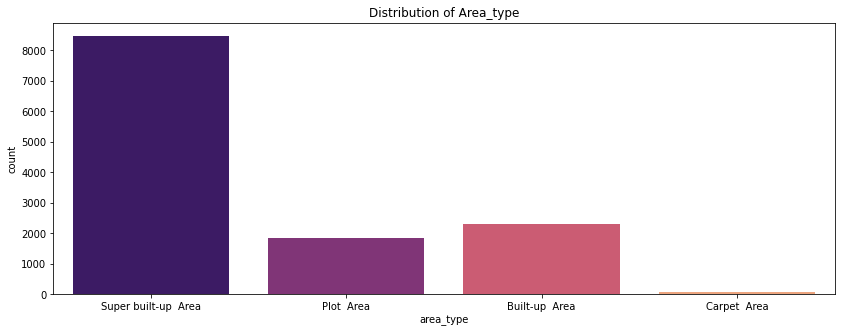

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(df['area_type'],palette = "magma")
plt.title('Distribution of Area_type');

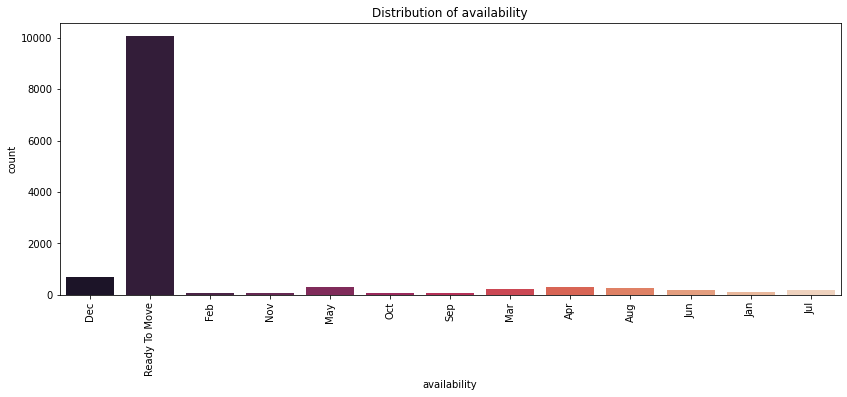

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(df['availability'],palette ='rocket')
plt.xticks(rotation='vertical')
plt.title('Distribution of availability');

In [ ]:
df['BHK'] = df['size'].str.split(' ').str[0]
df['BHK'] = df['BHK'].astype(int)        # let us convert the size into integer

In [ ]:
df.BHK.describe()

count    12710.000000
mean         2.737136
std          1.205097
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: BHK, dtype: float64

- so more than 75% of the BHK values lies below 4

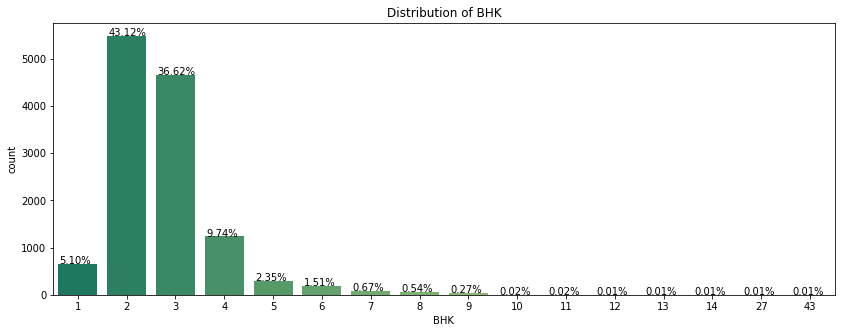

In [ ]:
plt.figure(figsize=(14,5))
ax = sns.countplot(df['BHK'],palette ='summer')
plt.title('Distribution of BHK')

for p in ax.patches:
   ax.annotate('{:.2f}{}'.format(p.get_height()/12710*100,'%'), (p.get_x()+0.03, p.get_height()+0.01))

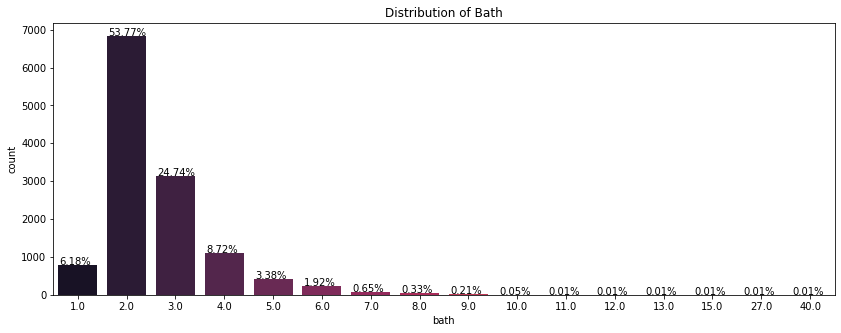

In [ ]:
plt.figure(figsize=(14,5))
ax = sns.countplot(df['bath'],palette ='rocket')
plt.title('Distribution of Bath');

for p in ax.patches:
   ax.annotate('{:.2f}{}'.format(p.get_height()/12710*100,'%'), (p.get_x()+0.03, p.get_height()+0.01))

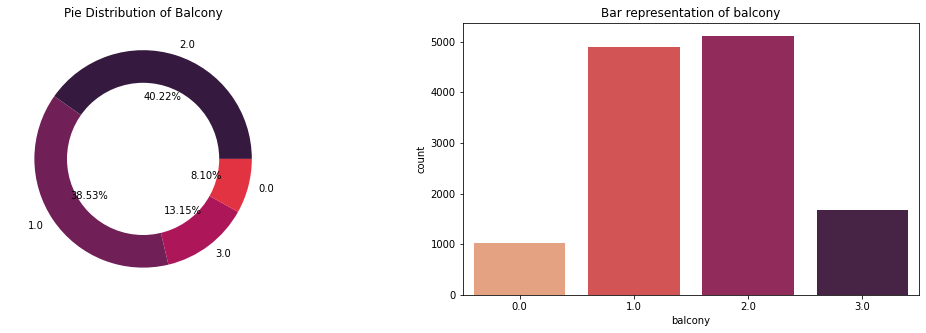

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.pie(df['balcony'].value_counts(), 
        labels=df['balcony'].value_counts().index, 
        colors=sns.color_palette('rocket'), 
        autopct='%.2f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Pie Distribution of Balcony')

plt.subplot(1,2,2)
sns.countplot(df['balcony'],palette= 'rocket_r')
plt.title('Bar representation of balcony')
plt.show()

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
#this function will split the data which has range values and add both of them and divide by 2

In [ ]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()] # this will exclude all the null values

In [ ]:
plt.rcParams['figure.figsize'] = 15,6

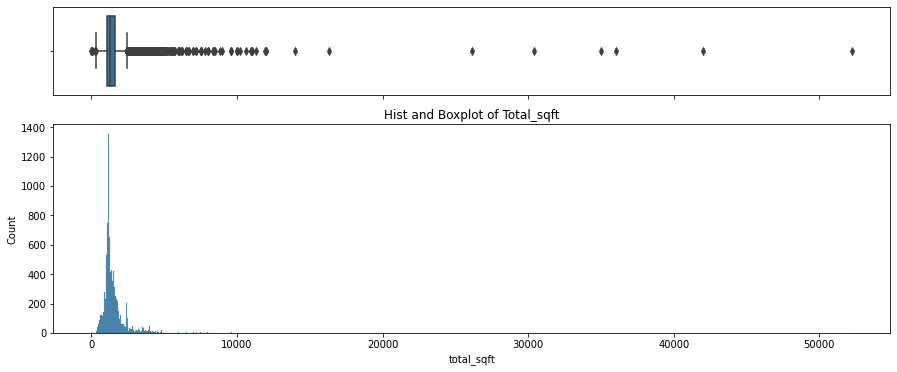

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.40, .95)})
sns.boxplot(df["total_sqft"], ax=ax_box)
sns.histplot(data=df, x="total_sqft", ax=ax_hist)

ax_box.set(xlabel='')
plt.title('Hist and Boxplot of Total_sqft')
plt.show();

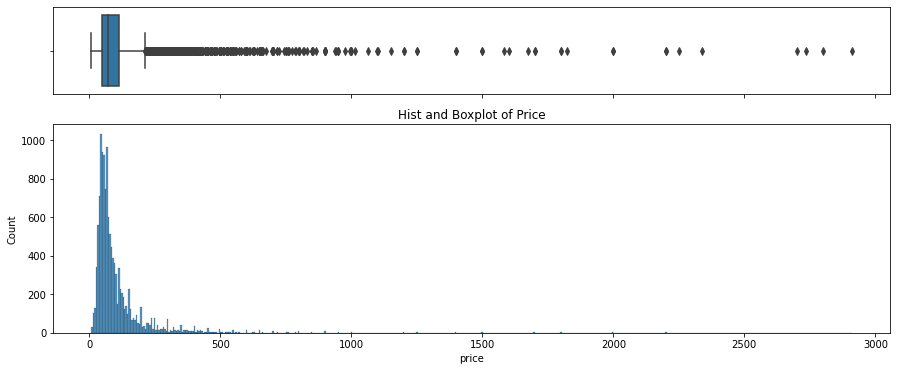

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.40, .95)})
sns.boxplot(df["price"], ax=ax_box)
sns.histplot(data=df, x="price", ax=ax_hist)

ax_box.set(xlabel='')
plt.title('Hist and Boxplot of Price')
plt.show();

Inferences:

- When considering the area_type Super built up area has the most numbers
- Most people prefer Ready to move houses in contrast to immediate possession and houses that will be ready 
- most people prefer 2,3,or 4 BHK more
- Total_sqft seems is right skewed and has a lot of outliers present in it which must be removed to get a clear picture
- Majority prefer house having 2 baths
- Coming to balcony 1 and 2 is more preferred
- As with the case of total_sqft price has a lot of outliers present in it which must be adjusted ( one thing we can do is we can multiply price with sqft and create a new feature)

- looking at the count of BHK we can drop BHK after 8
- looking at the count of bath we can drop any after 8

### Feature Engineering

In [ ]:
df2 = df.copy()

- creating a price_per_sqft feature

In [ ]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615


- location feature

In [ ]:
len(df2.location.unique())

1259

In [ ]:
df2.location = df2.location.str.strip()
#strip will remove all the whitespaces
location = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

- if a certain location has less than 10 counts it will not be useful for our model in anyway let us see how many we have

In [ ]:
count_less_than10 = location[location<=10]
count_less_than10

location
Nagappa Reddy Layout    10
Thyagaraja Nagar        10
Ganga Nagar             10
Naganathapura           10
Dairy Circle            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1013, dtype: int64

- out of 1248 we have 1013 which have less than 10 counts

In [ ]:
df2.location = df2.location.apply(lambda x: 'other' if x in count_less_than10 else x)
len(df2.location.unique())

236

- we can also create a new function which will have the directions of these locations.As we know Bangalore is broadly divided into 5 zones: Central, North, South, East and West Bangalore
- Even though it will not be much helpful for model building it will just make analysis a bit easier,and it is just a personal curiosity

In [ ]:
Central = ['Magadi Road','Ulsoor','Cunningham Road','Shivaji Nagar']

North = ['Kothanur','Bisuvanahalli','Thanisandra',"Yelahanka",'Hebbal','Begur Road','Hegde Nagar','Kaval Byrasandra','Sanjay nagar','Yeshwanthpur',
         'Devanahalli','Malleshwaram','Shampura','Hormavu','Vishwapriya Layout','Nagavara','Hebbal Kempapura','Nagasandra','Kogilu','Budigere',
         'Kalyan nagar','OMBR Layout','Horamavu Agara','Jakkur','TC Palaya','Narayanapura','Hennur','Kodigehaali','Jalahalli','Sultan Palaya',
         'Vidyaranyapura','Amruthahalli','Kenchenahalli','Banjara Layout','Kereguddadahalli','Kammanahalli','Chikkabanavar','HRBR Layout',
         'R.T. Nagar','Jalahalli East','Abbigere','Tindlu','Cox Town','HBR Layout','Yelahanka New Town','Sahakara Nagar','Rachenahalli',
         'Horamavu Banaswadi','Babusapalaya','Cooke Town','Banaswadi','Benson Town','Hennur Road']

South = ['Electronic City Phase II','Uttarahalli','7th Phase JP Nagar','Gottigere','Sarjapur','Raja Rajeshwari Nagar','Electronic City',"Kanakpura Road",
'Electronics City Phase 1',"Chikkalasandra","Doddathoguru",'Bommanahalli','Devarachikkanahalli','Kothannur','Kalena Agrahara','ISRO Layout','Sarjapura - Attibele Road',
  'Chandapura','Akshaya Nagar','LB Shastri Nagar','Kudlu Gate','8th Phase JP Nagar','Bommasandra Industrial Area','Hulimavu','Hosa Road','Attibele',
  'Kumaraswami Layout','HSR Layout','Padmanabhanagar','1st Block Jayanagar','Kammasandra','Dommasandra','Talaghattapura','Jigani','9th Phase JP Nagar',
  'Giri Nagar','Singasandra','Mallasandra','Begur','JP Nagar','Malleshpalya','Kaggalipura','6th Phase JP Nagar','Somasundara Palya',
  'Bommasandra','Harlur','Bannerghatta Road','5th Phase JP Nagar','Billekahalli','Anekal','Hosur Road','Brookefield','Yelenahalli','Vittasandra',
  'Subramanyapura','Basavangudi','Banashankari Stage III','Sector 7 HSR Layout','Rajiv Nagar','Arekere','Mico Layout','Banashankari','Kanakapura',
  'Konanakunte','Vasanthapura','Hosakerehalli','Kodichikkanahalli','Anjanapura','Gubbalala','Parappana Agrahara','Kudlu','Banashankari Stage VI',
  'Kathriguppe','Yelachenahalli','1st Phase JP Nagar','NGR Layout','Ananth Nagar','Choodasandra','Kaikondrahalli','Neeladri Nagar','Doddakallasandra',
  'Rayasandra','Banashankari Stage V','2nd Phase Judicial Layout','Poorna Pragna Layout','Judicial Layout','Banashankari Stage II','Bannerghatta',
  'Marsur','Karuna Nagar','Bommenahalli','Sector 2 HSR Layout','BTM Layout','BTM 2nd Stage','Sarakki Nagar','Lingadheeranahalli']

East =['Chikka Tirupathi','Whitefield','Marathahalli','Bellandur','Ramagondanahall',"Kundalahalli","Sarjapur  Road",'KR Puram','Bhoganhalli','Lakshminarayana Pura',
       'Murugeshpalya','Varthur','Gunjur','Haralur Road','Garudachar Palya','EPIP Zone','Kasavanhalli','Domlur','Ramamurthy Nagar','Kadugodi',
       'Anandapura','Kannamangala','CV Raman Nagar','Pattandur Agrahara','Panathur','Koramangala','Ambedkar Nagar','Balagere','Old Madras Road',
       'Kaggadasapura','AECS Layout','Munnekollal','Thigalarapalya','Ardendale','Kodihalli','Sompura','Dodda Nekkundi','Battarahalli','Ambalipura',
       'Hoodi','Margondanahalli','GM Palaya','Mahadevpura','Indira Nagar','Varthur Road','Old Airport Road','Kasturi Nagar','Green Glen Layout',
       'Thubarahalli','Seegehalli','BEML Layout','NRI Layout','ITPL','Iblur Village','Channasandra','Frazer Town','Pai Layout','Sonnenahalli',
       'Prithvi Layout','Badavala Nagar','Nagavarapalya','Hoskote','Bharathi Nagar','Kadubeesanahalli','Ramagondanahalli']

west = ['Mysore Road','Kengeri','Binny Pete','Dasanapura','Rajaji Nagar','Nagarbhavi','Vishveshwarya Layout','Kengeri Satellite Town',
        'Mahalakshmi Layout','Vijayanagar','Dasarahalli','Gollarapalya Hosahalli','Basaveshwara Nagar','2nd Stage Nagarbhavi','Kambipura','Tumkur Road',
        'Chamrajpet','Laggere']

<p align='center'><img src ="https://media.makeameme.org/created/it-was-tiring.jpg" width="300"/>

In [ ]:
df2['new_location'] = df2['location']

In [ ]:
def replace(feature1,feature2):
  df2['new_location'] = df2['new_location'].replace(dict.fromkeys(feature1,feature2))

In [ ]:
replace(Central,'central')
replace(North,'north')
replace(South,'south')
replace(East,'east')
replace(west,'west')

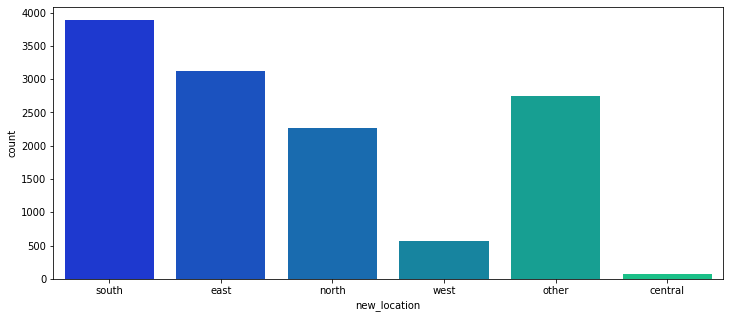

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df2['new_location'],palette='winter');

### Outlier Removal

In [ ]:
df3 = df2.copy()

In [ ]:
df3.shape

(12668, 11)

In [ ]:
df3.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,new_location
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,south
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,east


- Generally speaking for any BHK the size of a room will be of around 300sqft and not less than that.
- for example in index[0] 2BHK - 1056sqft which divided gives = (1056/2) =528
- so we dont want any sqft value which when divided is less than let us say 300

In [ ]:
df3[df3.total_sqft / df3.BHK <300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,new_location
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810,east
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296,south
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000,other
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696,north
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268,west


In [ ]:
print("Before negating",df3.shape)
df4 = df3[~(df3.total_sqft / df3.BHK <300)]
print("After negating",df4.shape)

Before negating (12668, 11)
After negating (12013, 11)


##### Continuos features

In [ ]:
continuos = [feature for feature in df3.columns if df3[feature].dtype != "O"]
continuos

['total_sqft', 'bath', 'balcony', 'price', 'BHK', 'price_per_sqft']

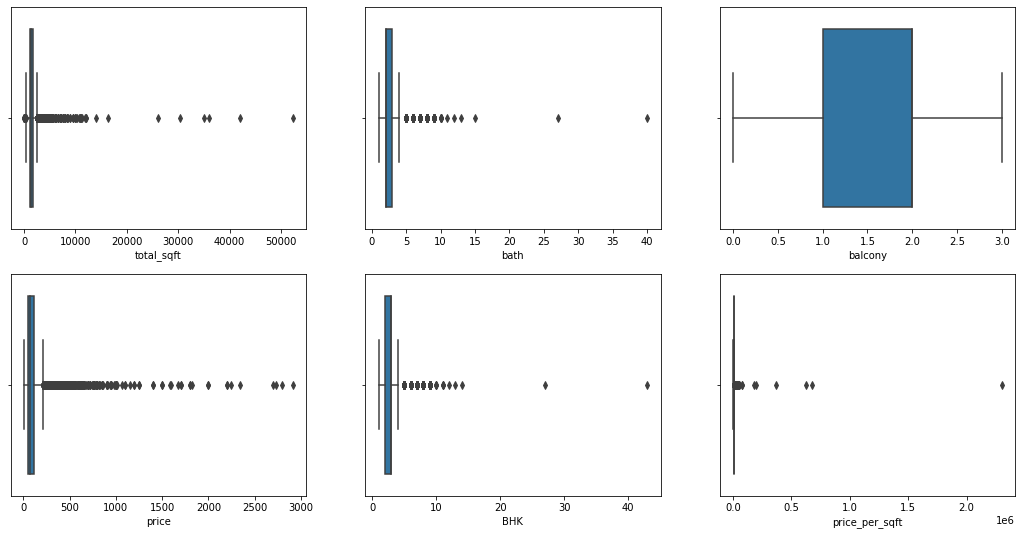

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(18,9))
for variable, subplot in zip(continuos,ax.flatten()):
  sns.boxplot(df3[variable],ax=subplot)

- as we can see we have a lot of outliers present in all the continuos_features except balcony

- It is not like we must remove these outliers in price_per_sqft,we may also chose to keep it,in here we will choose the latter.

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [ ]:
df4 = remove_pps_outliers(df3)
df4.shape

(10826, 11)

##### if we see some values of 2BHK are higher than 3BHK in the same sqft range now there are many reasons for it:
- it could be an error
- those of 3BHK could be old homes and 2BHK could be new ones
- The price may actually be varying because even in the same place the price between two BHK's sometimes have a huge gap

we can keep them or we can remove them we will choose the latter this time.

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

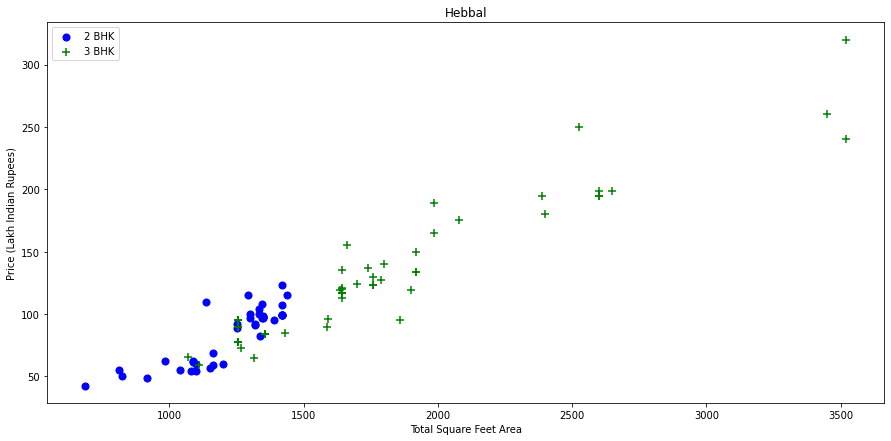

In [ ]:
plot_scatter_chart(df4,"Hebbal")

- create a function to remove the 2bhk apartments which has higher price than 3bhk in the same location

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df4 = remove_bhk_outliers(df4)

In [ ]:
df5 = df4.copy()
df5.shape

(7542, 11)

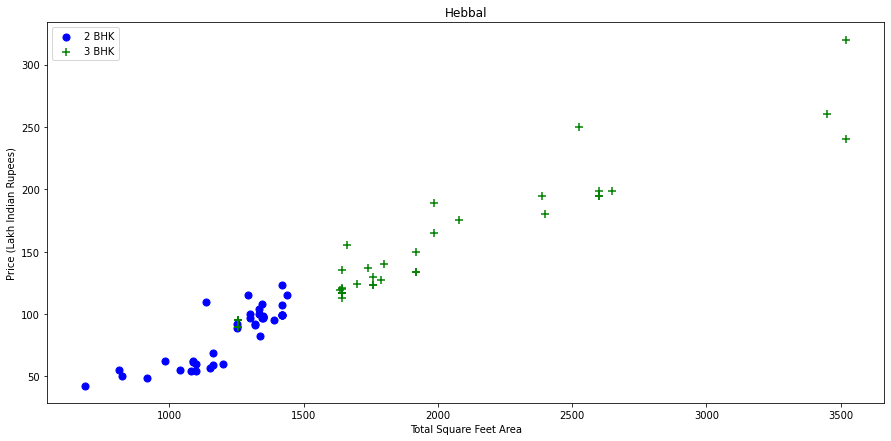

In [ ]:
plot_scatter_chart(df5,"Hebbal")

- let us plot an histogram to check the distribution of the data

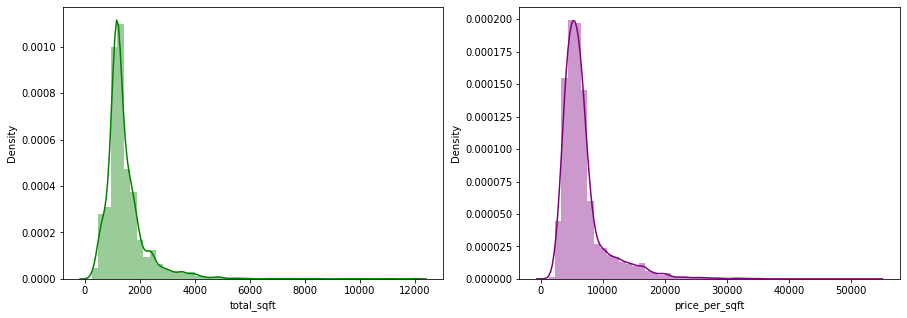

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df5['total_sqft'],color='g')

plt.subplot(1,2,2)
sns.distplot(df5['price_per_sqft'],color='purple');

- seems like we still have quite a bit of extreme which is fine,because we can standardize the data to make it normal,or we can even log transform the data

- let us also remove outliers from BHK and bath

In [ ]:
df5 = df5.drop(df5[df5['bath']>9].index)
df5 = df5.drop(df5[df5['BHK']>9].index)

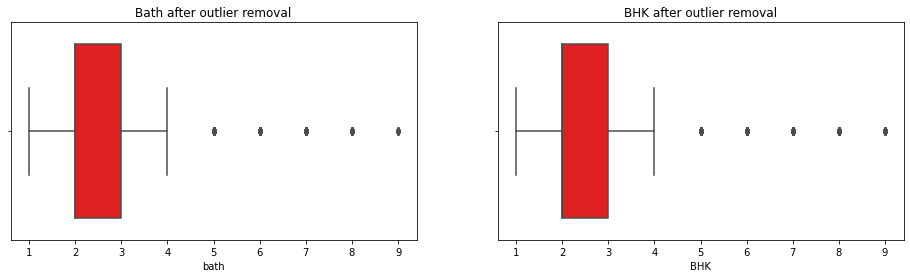

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.boxplot(df5['bath'],color='r')
plt.title('Bath after outlier removal')

plt.subplot(1,2,2)
sns.boxplot(df5['BHK'],color='r')
plt.title('BHK after outlier removal');


- even though there are a bit of outliers still present we will let it be

- another thing we need to keep in mind is that the number of bathrooms should not be more than BHK+2

In [ ]:
df5[df5['bath'] >df5['BHK']+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,new_location
1521,Plot Area,Ready To Move,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.333333,west
1655,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520,north
6791,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330,north
10116,Plot Area,Ready To Move,other,3 Bedroom,2400.0,6.0,2.0,775.0,3,32291.666667,other


In [ ]:
print('shape before',df5.shape)
df6 = df5[~ (df5['bath'] >df5['BHK']+2)]
print('shape after',df6.shape)

shape before (7533, 11)
shape after (7529, 11)


### Correlation

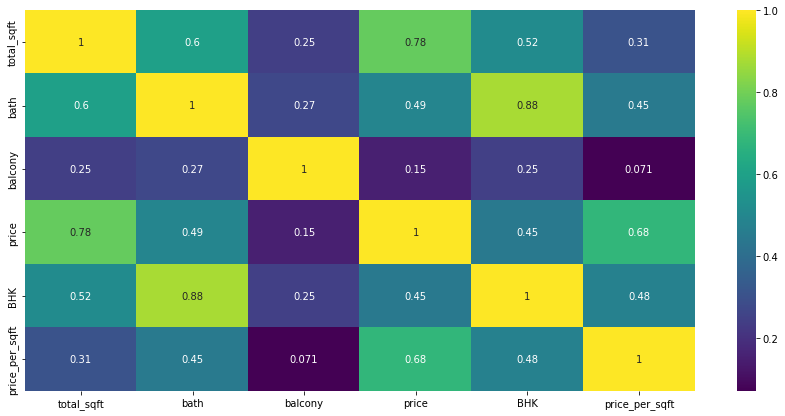

In [ ]:
corrmat = df6.corr()
sns.heatmap(corrmat,annot=True,cmap='viridis');

Inferences:
- total_sqft has a good correlation with bath
- total_sqft has a good correlation with price
- bath has a high correlation with BHK

### HYPOTHESIS TESTING

    H0 : Houses having Super-built-up area will be costlier
    H1 : Houses having Super-built-up area will be cheaper than other type

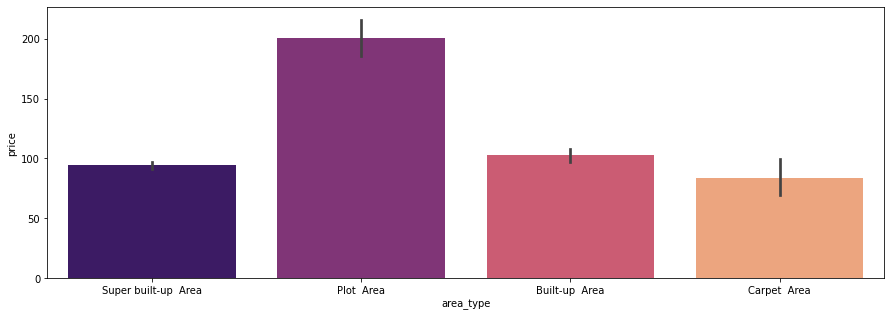

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='area_type',y='price',data=df6,palette='magma');

- we reject the null hypothesis since super built-up area are not the costliest

    H0: Ready to move/ Immediate Possession will be costlier
    H1: Building being built will be costlier

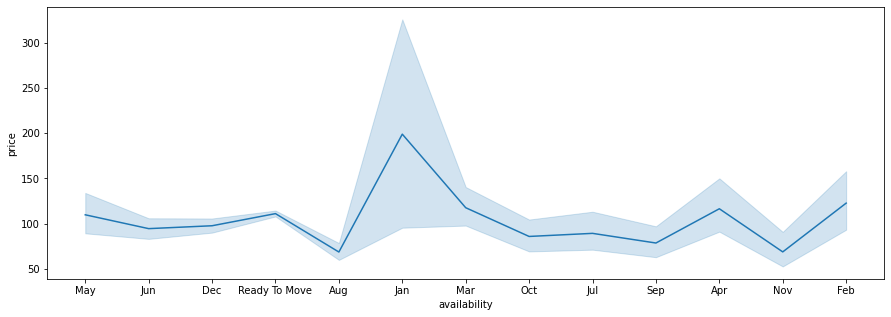

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='availability',y='price',data=df6,palette='summer');

- we reject the null hypothesis because despite having huge variance in months there is no statistical evidence that house which are available for Ready to move are costlier

    H0:Posh location will cost more
we cannot actually prove this hpothesis because the posh areas in bangalore in not centered in one place instead it is spread out throughout the city

    H0 :as the BHK increases so does the cost
    H1 : there is no change in price with the increase in BHK

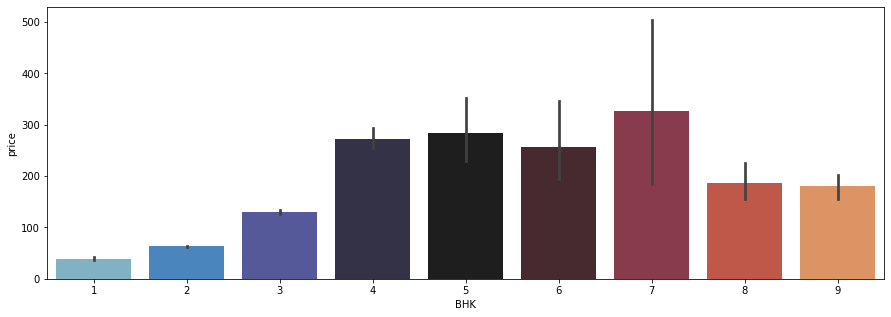

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='BHK',y='price',data=df6,palette='icefire');

- we will accept the NUll hypothesis because despite having huge variance as the BHK increases it is clear the price does increse

    H0: as the sqft increases so does the cost
    H1: even with the increase in sqft the cost does not increase

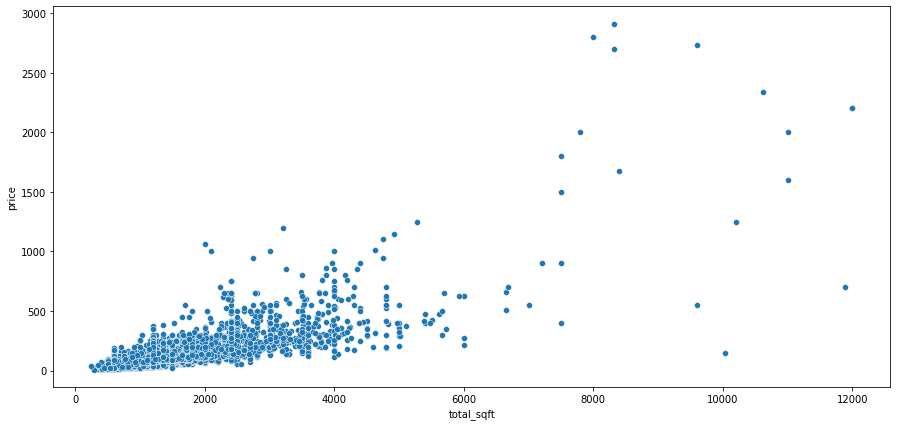

In [ ]:
sns.scatterplot(x='total_sqft',y='price',data=df6)

- we will accept NULL hypothesis because despite having a bit of outliers present it is clear that there is a linear increase in price as total_sqft increases.

    H0: house having 3-4 bath cost more
    H1: house having 1-2 bath cost more

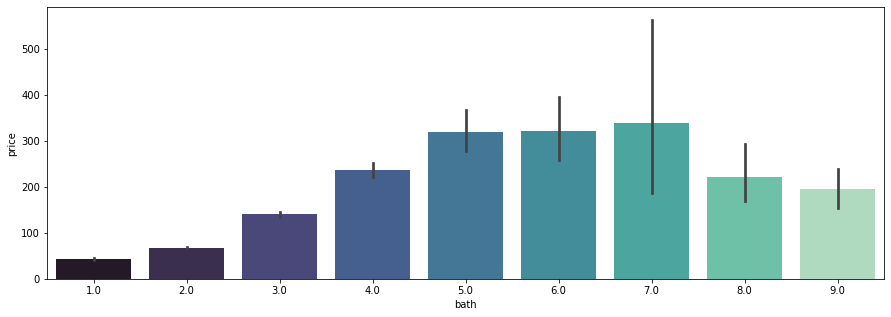

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='bath',y='price',data=df6,palette='mako');

-we will accept the NULL hypothesis because there is a gradual increase in price as the number of bath increases

    H0:House having a balcony costs more than one not having one
    H1:There is no impact on price whether balcony is there or not

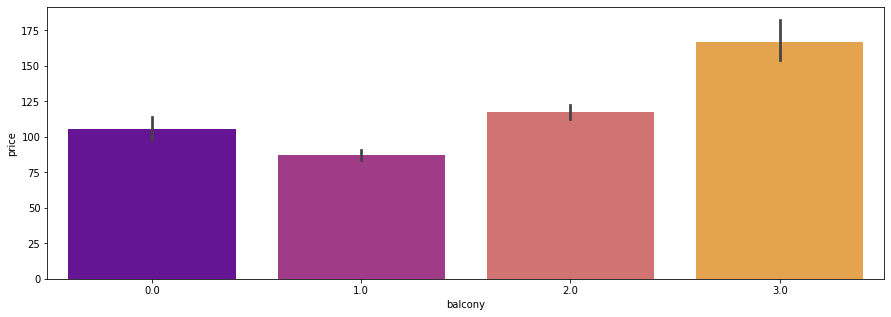

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='balcony',y='price',data=df6,palette='plasma');

- we will accept NULL hypothesis because even though the houseprice of no balcony is equal to those having 2 balconies we can also see that for some strange reason if a house has 3 balcony the cost is very high

In [ ]:
df6.to_csv('BH_processed.csv',index=False)